In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.cluster import KMeans

#### Load the date

In [22]:
data = pd.read_csv("3.01. Country clusters.csv")
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


#### Map the data

In [23]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English': 0, 'French': 1, 'German': 2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


#### Select the features

In [24]:
x = data_mapped.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


#### Clustering with KMeans ####

In [25]:
kmeans = KMeans(2)

In [26]:
kmeans.fit(x)

KMeans(n_clusters=2)

#### Clustering results

In [27]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 0, 0, 0, 0], dtype=int32)

In [28]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters 

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,0


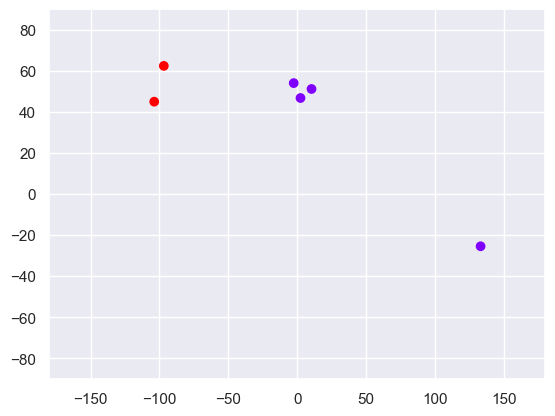

In [29]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c = data_with_clusters['Clusters'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### Selecting the number of clusters


#### WCSS

In [30]:
kmeans.inertia_

17246.714500000006

In [32]:
wcss=[]

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [33]:
wcss

[42605.41356666667,
 17246.714500000006,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

### The Elbow Method

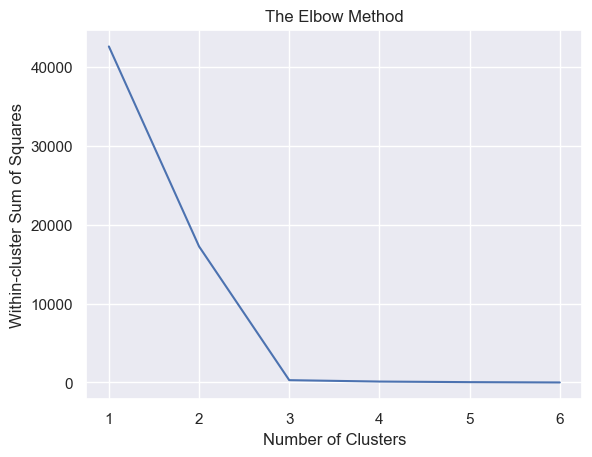

In [34]:
number_clusters = range(1, 7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()